# Part I - (Ford GoBike System Data)
## by (Kelvin Jason)

## Introduction
The Ford GoBike system Data contains information about the individual rides made in the bike sharing system. From this data, we may need to understand when most trips are taken and what may be influencing the number of trips taken at a certain time and during certain conditions.



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

We now load our PISA daatset ahead of the exloration stage


In [2]:
ford=pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
ford.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
#Overview of data shape and composition
ford.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [5]:
print(ford.shape)
print(ford.nunique())

(183412, 16)
duration_sec                 4752
start_time                 183401
end_time                   183397
start_station_id              329
start_station_name            329
start_station_latitude        334
start_station_longitude       335
end_station_id                329
end_station_name              329
end_station_latitude          335
end_station_longitude         335
bike_id                      4646
user_type                       2
member_birth_year              75
member_gender                   3
bike_share_for_all_trip         2
dtype: int64


In [6]:
ford.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [7]:
ford['member_birth_year'].fillna(ford['member_birth_year'].mean(),inplace=True)

In [8]:
ford['member_gender'].value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [9]:
ford['start_station_name'].mode()

0    Market St at 10th St
dtype: object

In [10]:
ford['member_gender'].fillna(ford['member_gender'].mode(),inplace=True)
ford['start_station_id'].fillna(ford['start_station_id'].mode(),inplace=True)
ford['end_station_id'].fillna(ford['end_station_id'].mode(),inplace=True)
ford['start_station_name'].fillna(ford['start_station_name'].mode(),inplace=True)
ford['end_station_name'].fillna(ford['end_station_name'].mode(),inplace=True)

In [11]:
ford.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year             0
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

We have filled all the null entries with the most common entry and mean for the member birth year. The data set now has no null values!

### What is the structure of your dataset?

The data set has 183412 rows and 16 columns. Most of the data are numeric. The data has details of the starting points, end points and the user/rider. 

### What is/are the main feature(s) of interest in your dataset?

I am most interested to understand what influences the number of trips. Is it gender, the bike or generally the user.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The main columnsof interest could be the duration of ride, bike id, user type, gender and bike share for all trip. It would be interesting to see which gender records more rides, the bike id and how they relate to the number of rides and the duration of the rides.

## Univariate Exploration

__1. How is the distribution of duration in seconds?__

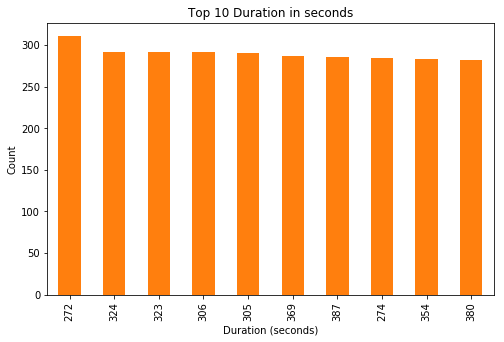

In [39]:
default_color = sb.color_palette()[1]
figsize=plt.figure(figsize=[8, 5])
ford.duration_sec.value_counts()[0:10].plot(kind='bar',title='Top 10 Duration in seconds',color=default_color)
plt.xlabel('Duration (seconds)')
plt.ylabel('Count')
plt.show()

The top 10 duration time forms a uniform distribution with most of the values being around 280 seconds.

__2. How is the gender of members distributed?__

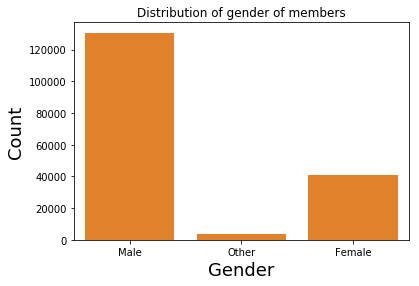

In [13]:
sb.countplot(data = ford, x = 'member_gender', color = default_color)
plt.xlabel('Gender',fontsize=18)
plt.ylabel('Count',fontsize=18)
plt.title('Distribution of gender of members')
plt.show()

There are more men members/riders and very few other gender.

__3. Who were the users/riders?__

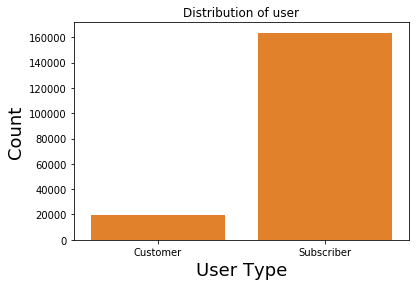

In [14]:
sb.countplot(data = ford, x = 'user_type', color = default_color)
plt.xlabel('User Type',fontsize=18)
plt.ylabel('Count',fontsize=18)
plt.title('Distribution of user')
plt.show()

We note that most users were subscribers. Actually, over 88% of the users were subscribers while only 11% were customers.

**4. How was the distribution of users' ages?**

In [15]:
ford['Start_date']=ford['start_time'].astype('datetime64')
ford['year']=ford['Start_date'].apply(lambda x: x.year)

In [16]:
ford['Start_date'].dt.year.unique()

array([2019])

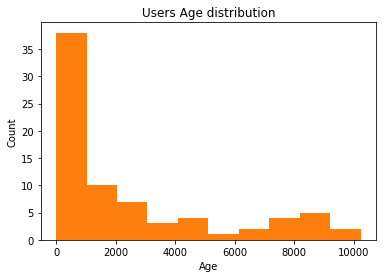

In [46]:
ford['users_age']=ford['year']-ford['member_birth_year']
figsize
ford.users_age.value_counts().plot(kind='hist',title='Users Age distribution',color=default_color,bins=10)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

The age distribution presents that most people are between 0-2000 years. This may be misrepresenting. 
We may want to compare the visual with the seaborn distplot

__5. What is the age distribution?__

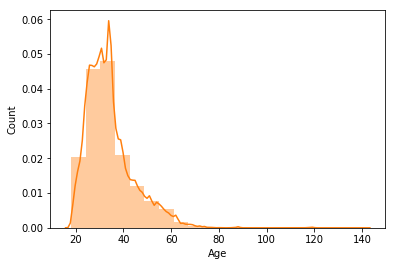

In [18]:
figsize
sb.distplot(ford['users_age'],color=default_color,bins=20);
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

It is now more clear that most of the users have age of between 30-40.
The age distribution is skewed to the right.

In [40]:
ford['Start_date']=ford['start_time'].astype('datetime64')
ford['day']=ford['Start_date'].dt.day_name()

In [42]:
ford['day']

0         Thursday
1         Thursday
2         Thursday
3         Thursday
4         Thursday
5         Thursday
6         Thursday
7         Thursday
8         Thursday
9         Thursday
10        Thursday
11        Thursday
12        Thursday
13        Thursday
14        Thursday
15        Thursday
16        Thursday
17        Thursday
18        Thursday
19        Thursday
20        Thursday
21        Thursday
22        Thursday
23        Thursday
24        Thursday
25        Thursday
26        Thursday
27        Thursday
28        Thursday
29        Thursday
            ...   
183382      Friday
183383      Friday
183384      Friday
183385      Friday
183386      Friday
183387      Friday
183388      Friday
183389      Friday
183390      Friday
183391      Friday
183392      Friday
183393      Friday
183394      Friday
183395      Friday
183396      Friday
183397      Friday
183398      Friday
183399      Friday
183400      Friday
183401      Friday
183402      Friday
183403      

In [41]:
ford['day'].value_counts()

Thursday     35197
Tuesday      31813
Wednesday    29641
Friday       28981
Monday       26852
Sunday       15523
Saturday     15405
Name: day, dtype: int64

__6. How is the distribution in days?__

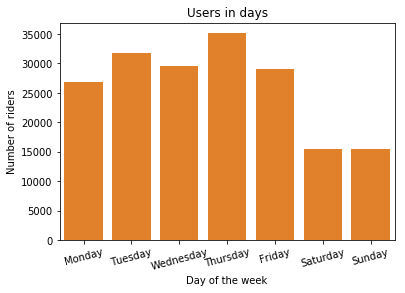

In [50]:
day_ordered=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sb.countplot(data=ford,x='day',color=default_color,order=day_ordered);
plt.xlabel('Day of the week')
plt.ylabel('Number of riders',fontsize=10)
plt.title('Users in days')
plt.xticks(rotation=15);

Most of the users preferred weekdays with the most common day being Thursday. Fewer users preferred weekends.

__7.Which was the most common start station?__

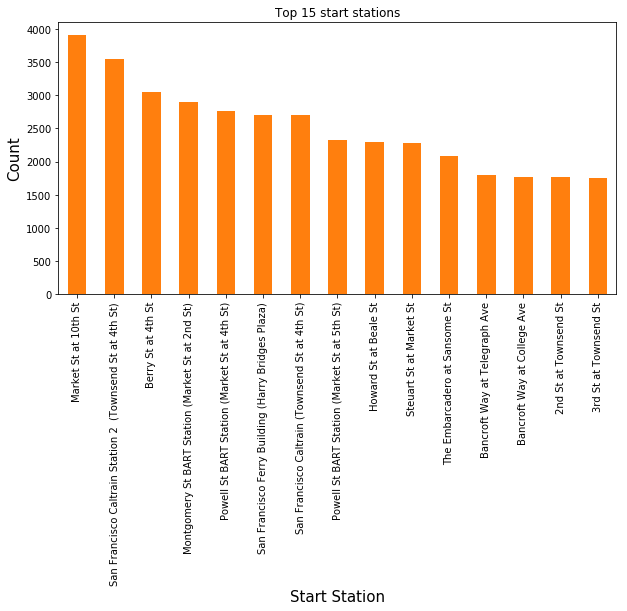

In [51]:
ford.start_station_name.value_counts()[0:15].plot(kind='bar',figsize=(10,5),title='Top 15 start stations',color=default_color)
plt.xlabel('Start Station',fontsize=15)
plt.ylabel('Count',fontsize=15);

The most common start station was Market St at 10th St

__8. Which was the most common end station?__

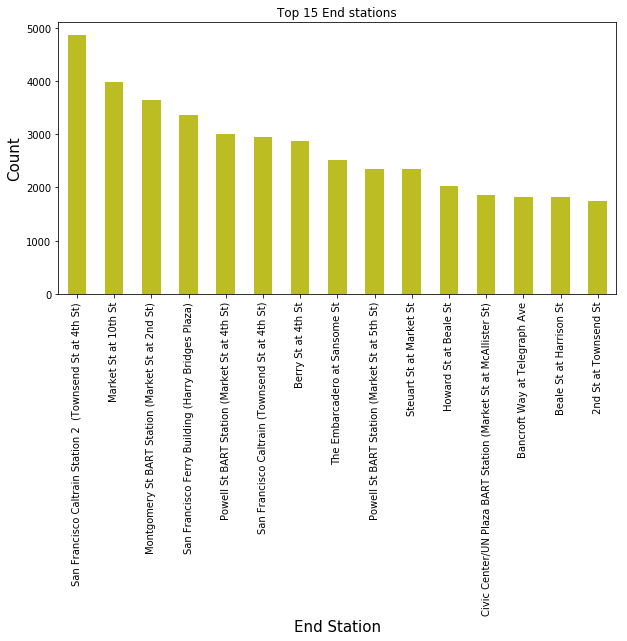

In [52]:
ford.end_station_name.value_counts()[0:15].plot(kind='bar',figsize=(10,5),title='Top 15 End stations',color=sb.color_palette()[8])
plt.xlabel('End Station',fontsize=15)
plt.ylabel('Count',fontsize=15);

The most common end station is San Francisco Caltrain Station 2

__9. Which was the most common bike id used?__

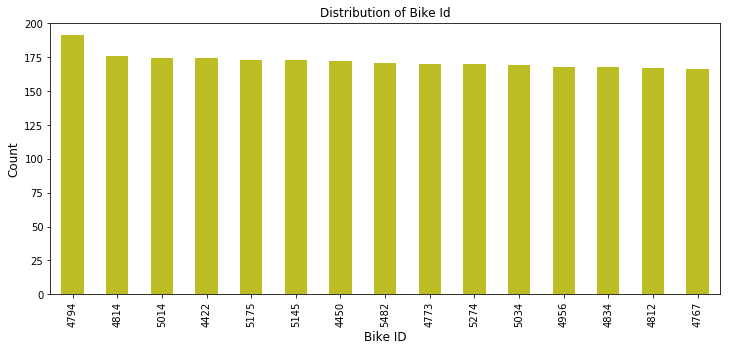

In [49]:
figsize=plt.figure(figsize=[12, 5])
ford.bike_id.value_counts()[0:15].plot(kind='bar',title='Distribution of Bike Id',color=sb.color_palette()[8])
plt.xlabel('Bike ID',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.show()

The most common bike id was 4794

__10.What percent of users share for all trip?__

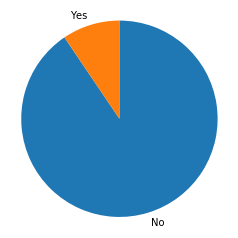

In [53]:
share=ford['bike_share_for_all_trip'].value_counts()
plt.pie(share,labels=share.index,startangle=90,counterclock=False);
plt.axis('square');

Most of the users did not share information for all trip

__11. What is the percentage of subscriber user?__

Subscriber    89.167557
Customer      10.832443
Name: user_type, dtype: float64


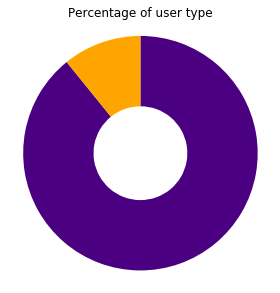

In [26]:
user_count=ford['user_type'].value_counts()
total=sum(user_count)
user_percent=user_count/total*100
print(user_percent)
labels=[r'Subscriber(89.17%)',r'Customer (10.46%)']
colors=['Indigo','Orange']
patches,texts=plt.pie(user_percent,startangle=90,colors=colors,counterclock=False,wedgeprops={'width':0.6});
plt.axis('square')
plt.tight_layout()
plt.title('Percentage of user type')
plt.show();

It is confirmed by the pie chart that the subscribers were more than the customers

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The age of most of the users are between 30-40.
The age distribution is skewed to the right, meaning that most of the users are young and as they progress in age, they withdraw.

There are more male riders than female.

Most of the users are subscribers.

It was important to also notice that there was a difference between the most common start point and end point.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

I filled the null values in the columns with null. I did this by filling them with the mode (most common entry in other non null values). This could help get a better visual of the columns.

I converted the data type of start date to datetime so that I could extract the year and week day from it.

## Bivariate Exploration

In this section, we shall be looking at distribution between two variables.

__12.How does bike id compare with the duration__

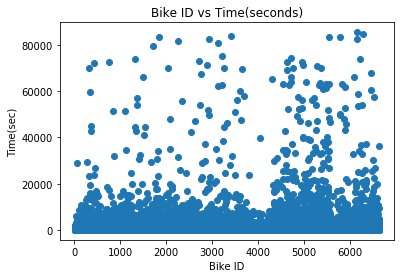

In [54]:
plt.scatter(data=ford,x='bike_id',y='duration_sec');
plt.xlabel('Bike ID')
plt.ylabel('Time(sec)')
plt.title('Bike ID vs Time(seconds)');

It seems that most of the bike id users took less than 20000 seconds


__13. How does the bike id compare with duration using jitter__

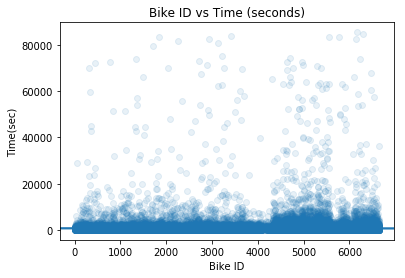

In [45]:
#sb.regplot(data=ford,x='bike_id',y='duration_sec',x_jitter=0.5,scatter_kws={'alpha':1/10});
#plt.xlabel('Bike ID')
#plt.ylabel('Time(sec)')
#plt.title('Bike ID vs Time(seconds)')

def plot_x(data,x,y,x_label,y_label,title):
    sb.regplot(data=ford,x=x,y=y,x_jitter=0.5,scatter_kws={'alpha':1/10});
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
plot_x(data=ford,x="bike_id",y="duration_sec",x_label="Bike ID",y_label="Time(sec)",title="Bike ID vs Time (seconds)")

Most of the bike ids took very minimal time, while there were some who took upto 80000 seconds. We notice that bike id 4000, most of the time taken by users did not go past 40000

__14.How does longitude compare with duration?__

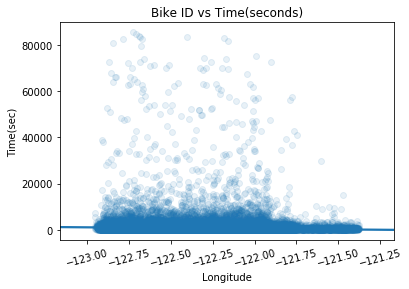

In [64]:
sb.regplot(data=ford,x='end_station_longitude',y='duration_sec',x_jitter=0.5,scatter_kws={'alpha':1/10});
plt.xlabel('Longitude')
plt.ylabel('Time(sec)')
plt.xticks(rotation=15)
plt.title('Bike ID vs Time(seconds)');

It is clear that most of the longitudes took less than 20000 seconds. Further, very minimal people of older ages took much time as compared to the younger riders.

__15.How long did it take across the days?__

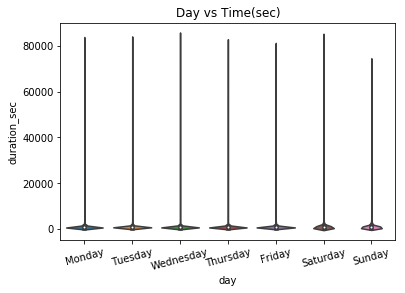

In [56]:
sb.violinplot(data=ford,x='day',y='duration_sec',order=day_ordered);
plt.xticks(rotation=15)
plt.title('Day vs Time(sec)');

Most of them again, are below 20000

__16.Lets look at the gender and time in subplots__

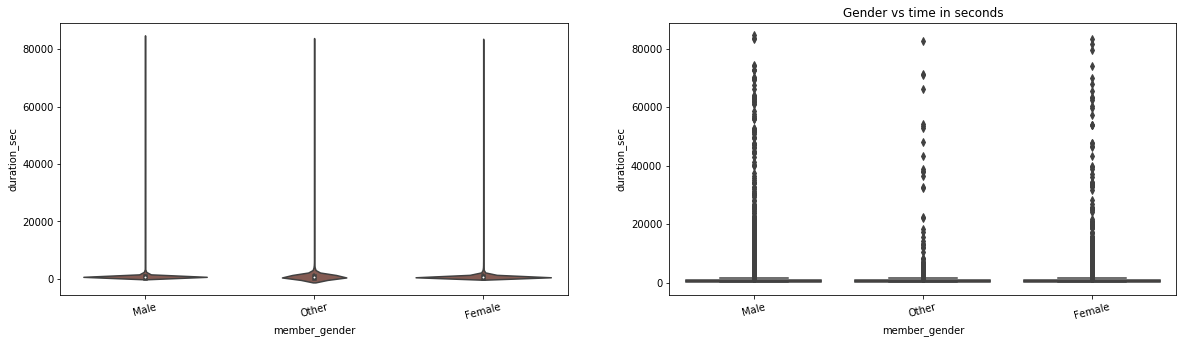

In [57]:
plt.figure(figsize=[20,5])
base_color=sb.color_palette()[5]
plt.subplot(1,2,1)
ax1=sb.violinplot(data=ford,x='member_gender',y='duration_sec',color=base_color)
plt.xticks(rotation=15);
plt.subplot(1,2,2)
sb.boxplot(data=ford,x='member_gender',y='duration_sec',color=base_color)
plt.xticks(rotation=15);
plt.title('Gender vs time in seconds');
#plt.ylim(ax1.get_ylim())

__17.How does gender compare to user type?__

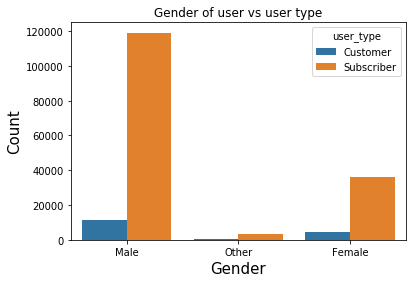

In [58]:
sb.countplot(data=ford,x='member_gender',hue='user_type');
plt.title('Gender of user vs user type')
plt.xlabel('Gender',fontsize=15)
plt.ylabel('Count',fontsize=15);

There are more male subscribers. We also see that all gender is in both user types.

__18.How does each gender compare with user type?__

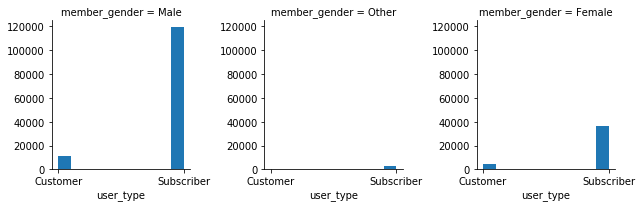

In [33]:
g=sb.FacetGrid(data=ford,col='member_gender');
g.map(plt.hist,'user_type');

There are barely no customers in other gender. 
There is a high subscriber rate among male users.

__19.How does the different gender users compare across the days of the week?__

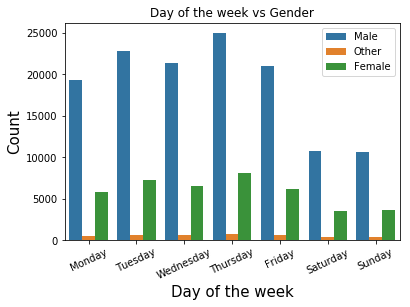

In [59]:
sb.countplot(data=ford,x='day',hue='member_gender',order=day_ordered);
plt.title('Day of the week vs Gender')
plt.xlabel('Day of the week',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.legend()
plt.xticks(rotation=25);

Men were most users across all days of the week. It is noted that as the number of men increased, the number of female also increased. The reverse is also true.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Most of the times across all gender types, ages and user types, the time taken for the ride was less than 20,000 seconds, with some outliers. 

The male gender had so many users such that male were more across all categories.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Getting the number of users per day, I noticed that as the number of men increased, that of women increased as well. Once there is a decrease in men, there is also likely a decrease in women numbers.

## Multivariate Exploration

Now, we shall look at plots of more than two variables and compare the relationships even further.

__20. How does user type compare with both the bike id and time taken?__

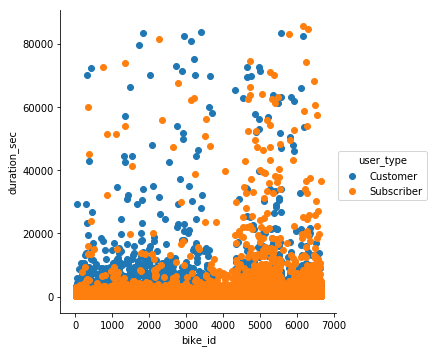

In [60]:
h=sb.FacetGrid(data=ford,hue='user_type',size=5)
h.map(plt.scatter,'bike_id','duration_sec')
h.add_legend();

There are more subscribers taking less time. More of them were around 5000 bike ids.

__21.How does the user type compare with bike id and duration separately?__

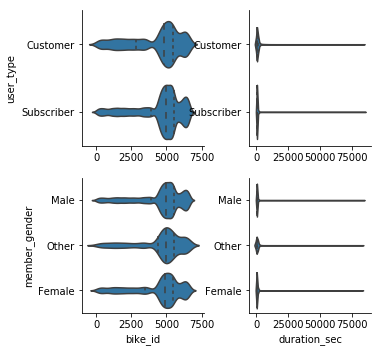

In [61]:
k=sb.PairGrid(data=ford,x_vars=['bike_id','duration_sec'],y_vars=['user_type','member_gender'])
k.map(sb.violinplot,inner='quartile');

Most of the customers took fewer seconds with some outliers.
The user id was mainly around 4900.

__22. How does the members' gender compare with both time taken and whether they shared information?__

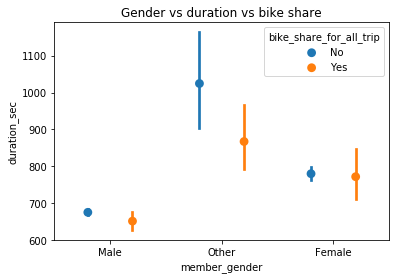

In [62]:
sb.pointplot(data=ford,x='member_gender',y='duration_sec',hue='bike_share_for_all_trip',dodge=0.4,linestyles='')
plt.title('Gender vs duration vs bike share');

More members/ users shared information about the whole trip apart from the other gender group.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

In the three comparison, we note that most subscribers spent less time. Actually, most of the outliers were for the customers.

Other gender seemed to be a reserved category and from the visual, we see that most of them did not share on information about the whole trip.

### Were there any interesting or surprising interactions between features?

Most common bike id was around 5000. It could be instresting to note why this was so. Could it be that its of good quality, or a team of users use the same bike id.

## Conclusions

In the data exploration stage, I started with univariate exploration. In this, it was important for me to notice the distribution among some variables such as the duration, the gender, user type, age, the day of the week, among others.
I noted that most users used very little time, while there were a few outliers who used more than 60000 seconds.

I also noted that most users were male and that most of them were subscribers, with only a few customers.

I as well noticed that most rides happened during weekdays and fewer rides were during weekends.

In the bivariate exploration, I got interested to further investigate the relationship between some mentioned variables such as gender vs user type, day of the week vs gender, age vs duration and many more.

It was interesting to notice that there was a common bike id, 5000, and that the distribution of the genders in the days of the week was relatively even as an increase in male gender led to an increase in the female gender.

Lastly, I got more curious and investigated more than two variables, mainly to see whether there is more relationship and to confirm what was already noticed. I used age vs duration vs gender in on eof the visuals. 

It was good to notice that the gender was relatively relational and that the most common bike id was at around 5000.
